### Loading model

In [1]:
from keras.models import load_model

c:\users\czho9\anaconda3\envs\tsf\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# change model path
model = load_model('D:\capstone\model_save\InceptionV3_similar_10class_200_non-base_layer.h5')

In [4]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_659 (Conv2D)             (None, 149, 149, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_659 (BatchN (None, 149, 149, 32) 96          conv2d_659[0][0]                 
__________________________________________________________________________________________________
activation_659 (Activation)     (None, 149, 149, 32) 0           batch_normalization_659[0][0]    
__________________________________________________________________________________________________
conv2d_660

In [11]:
dic={}
i=-1
for layer in model.layers[1:]:
    i=i+1
    print(i,layer.name)

0 conv2d_659
1 batch_normalization_659
2 activation_659
3 conv2d_660
4 batch_normalization_660
5 activation_660
6 conv2d_661
7 batch_normalization_661
8 activation_661
9 max_pooling2d_29
10 conv2d_662
11 batch_normalization_662
12 activation_662
13 conv2d_663
14 batch_normalization_663
15 activation_663
16 max_pooling2d_30
17 conv2d_667
18 batch_normalization_667
19 activation_667
20 conv2d_665
21 conv2d_668
22 batch_normalization_665
23 batch_normalization_668
24 activation_665
25 activation_668
26 average_pooling2d_64
27 conv2d_664
28 conv2d_666
29 conv2d_669
30 conv2d_670
31 batch_normalization_664
32 batch_normalization_666
33 batch_normalization_669
34 batch_normalization_670
35 activation_664
36 activation_666
37 activation_669
38 activation_670
39 mixed0
40 conv2d_674
41 batch_normalization_674
42 activation_674
43 conv2d_672
44 conv2d_675
45 batch_normalization_672
46 batch_normalization_675
47 activation_672
48 activation_675
49 average_pooling2d_65
50 conv2d_671
51 conv2d_673

### Preprocessing a single image

In [140]:
# change image path
img_path = 'D:\\capstone\\0eda1d0311829d7c9940836ccfd6a5e8.jpg'

In [141]:
from keras.preprocessing import image
import numpy as np

In [142]:
img = image.load_img(img_path, target_size=(299, 299))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

(1, 299, 299, 3)


### Displaying the test picture

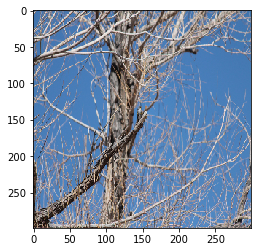

In [143]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

### Instantiating a model from an input tensor , a list of output tensors

In [144]:
from keras import models

In [152]:
# Visualize the output of the first 18 layers
layer_outputs = [layer.output for layer in model.layers[275:290]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

### Running the model in predict mode

In [153]:
activations = activation_model.predict(img_tensor)

In [154]:
first_layer_activation = activations[1]
print(first_layer_activation.shape)

(1, 8, 8, 768)


### Visualizing 31th channel

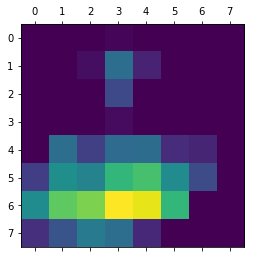

In [155]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')

### Visualizing every channel in every intermediate activation

In [156]:
layer_names = []
for layer in model.layers[275:290]:
    layer_names.append(layer.name)

In [157]:
images_per_row = 16

c:\users\czho9\anaconda3\envs\tsf\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


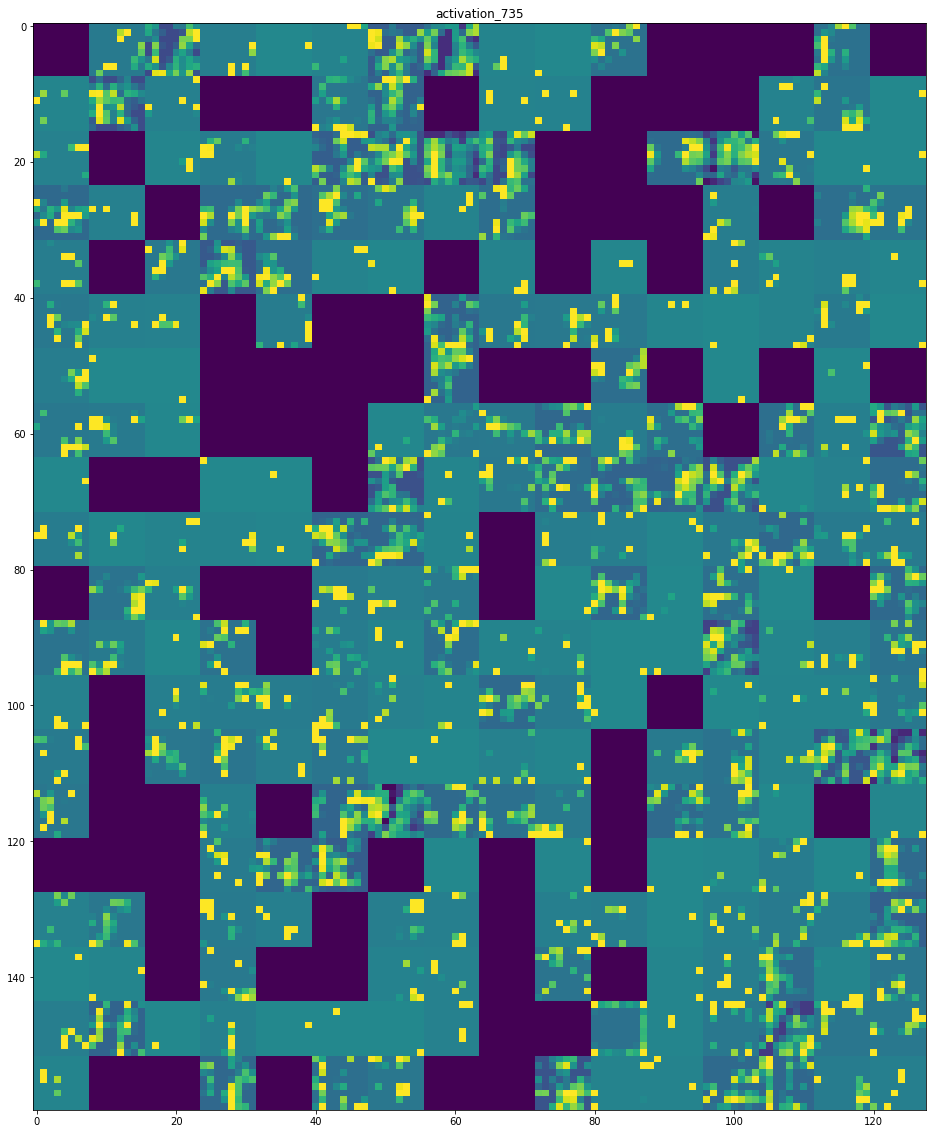

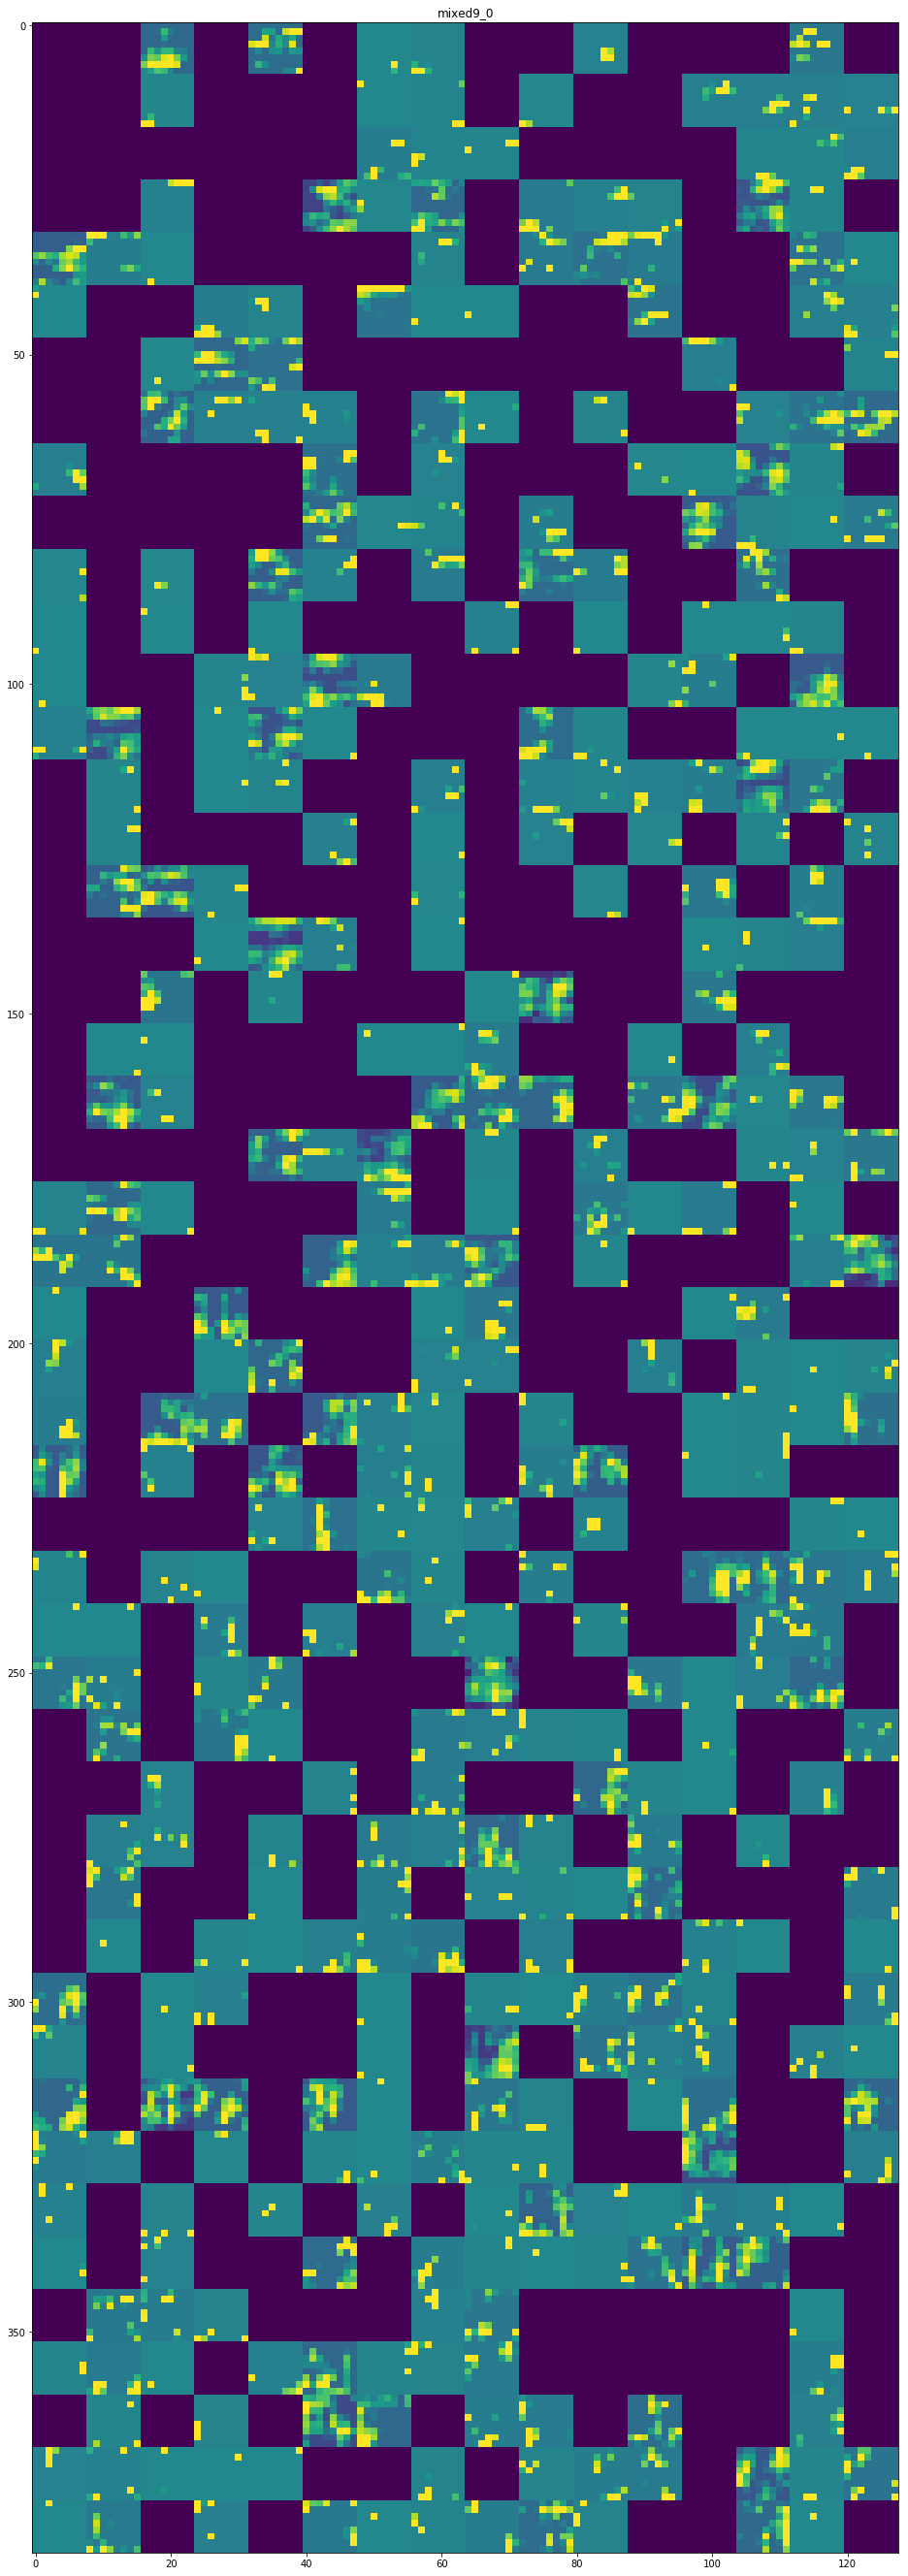

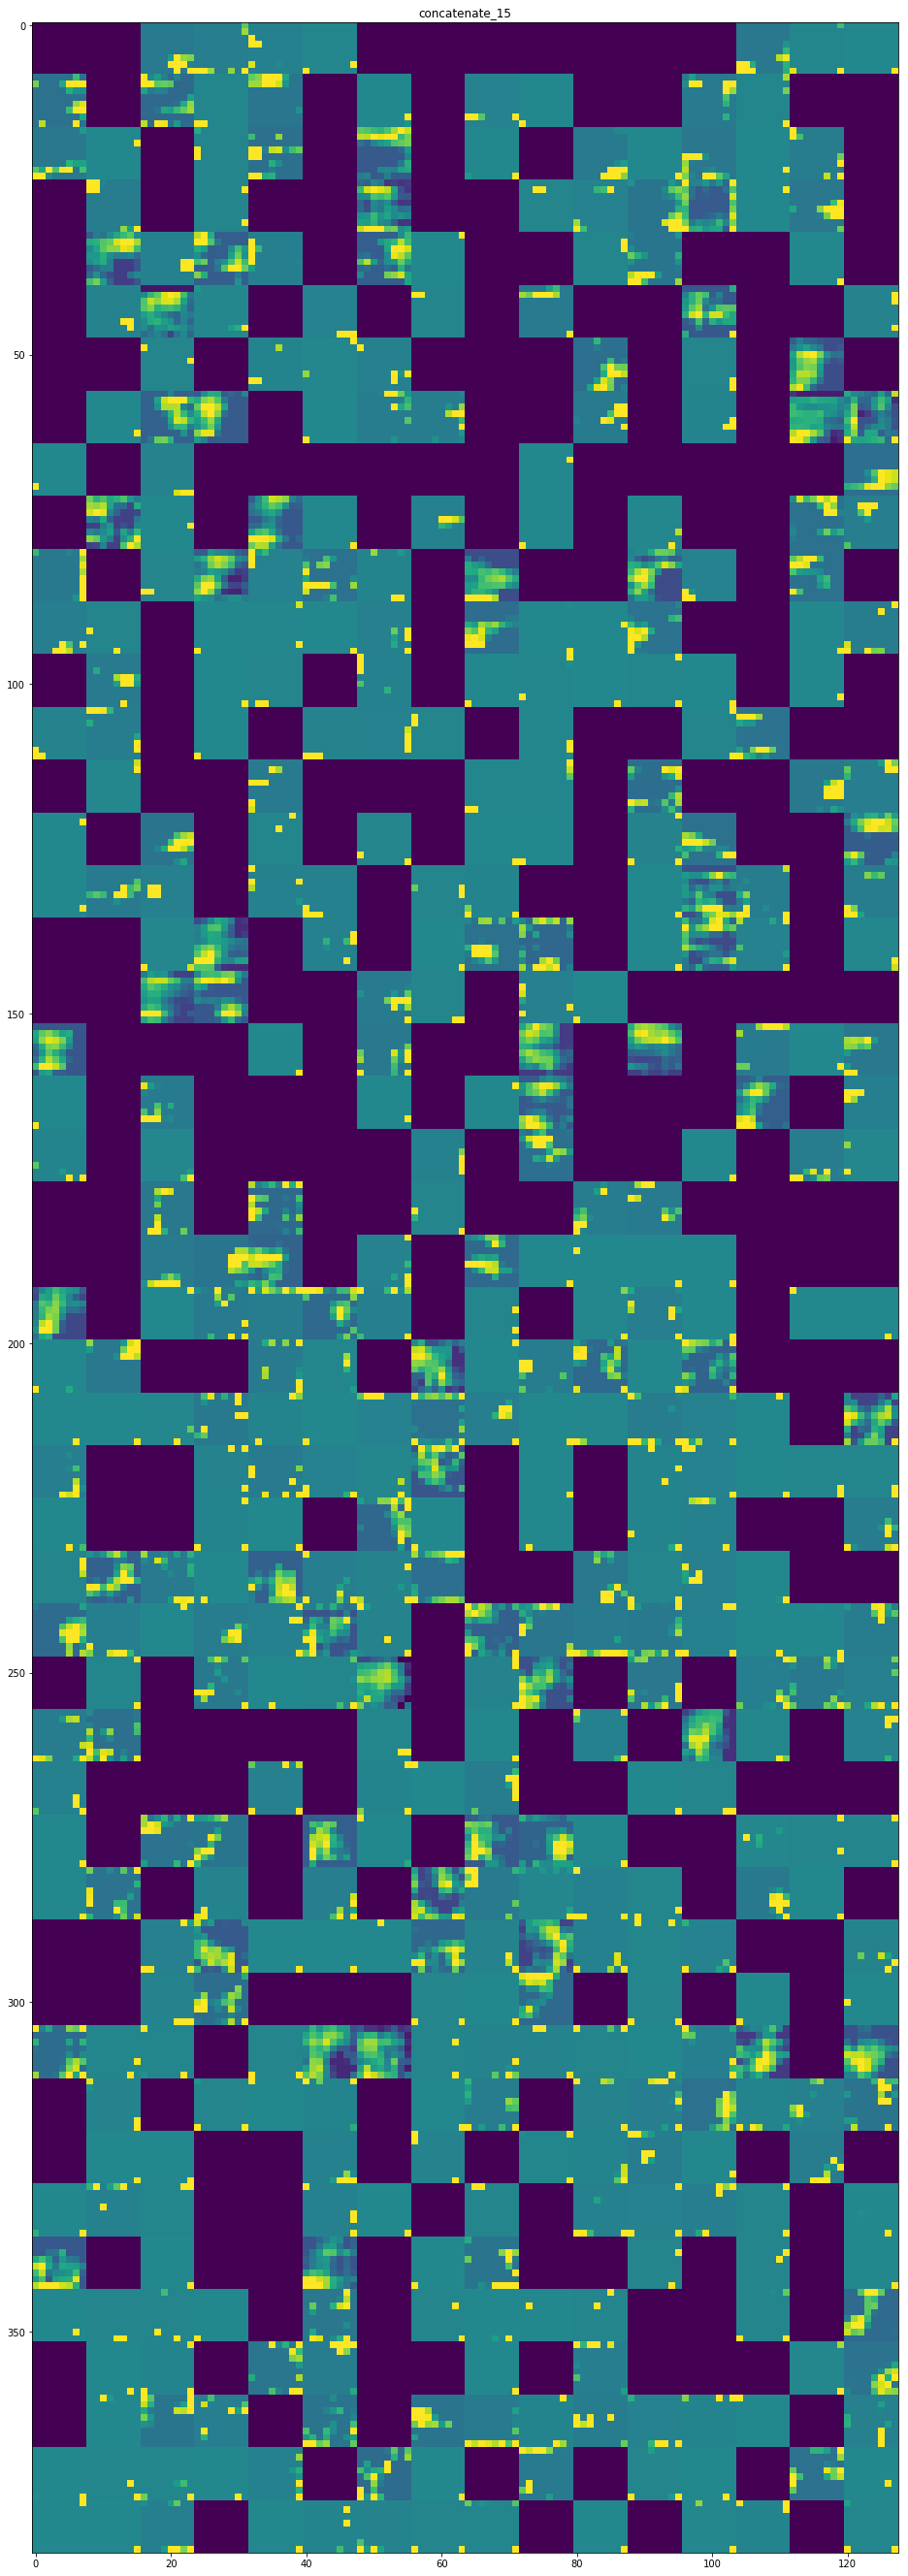

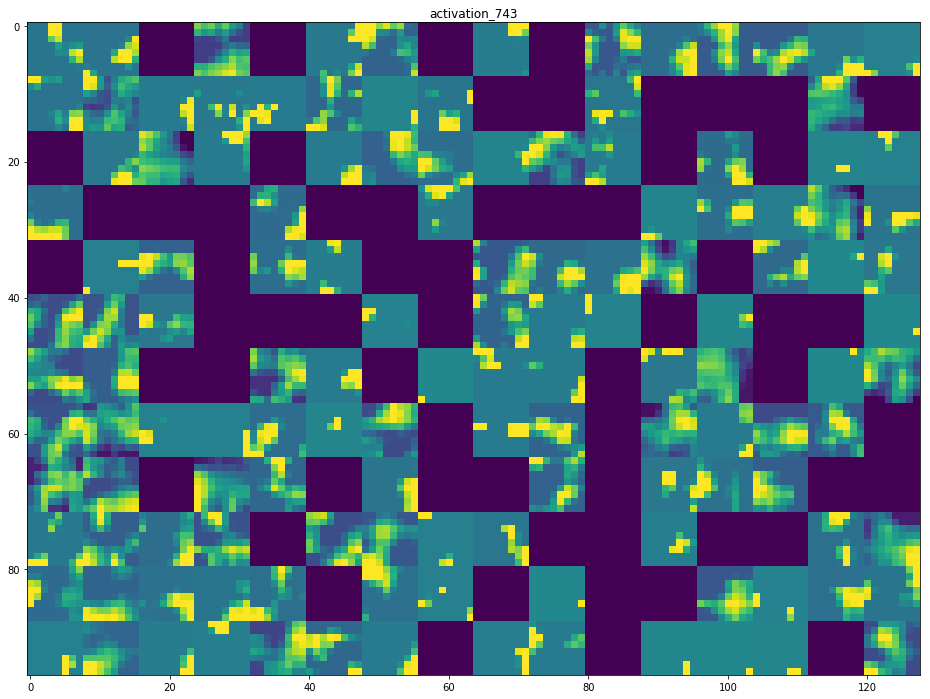

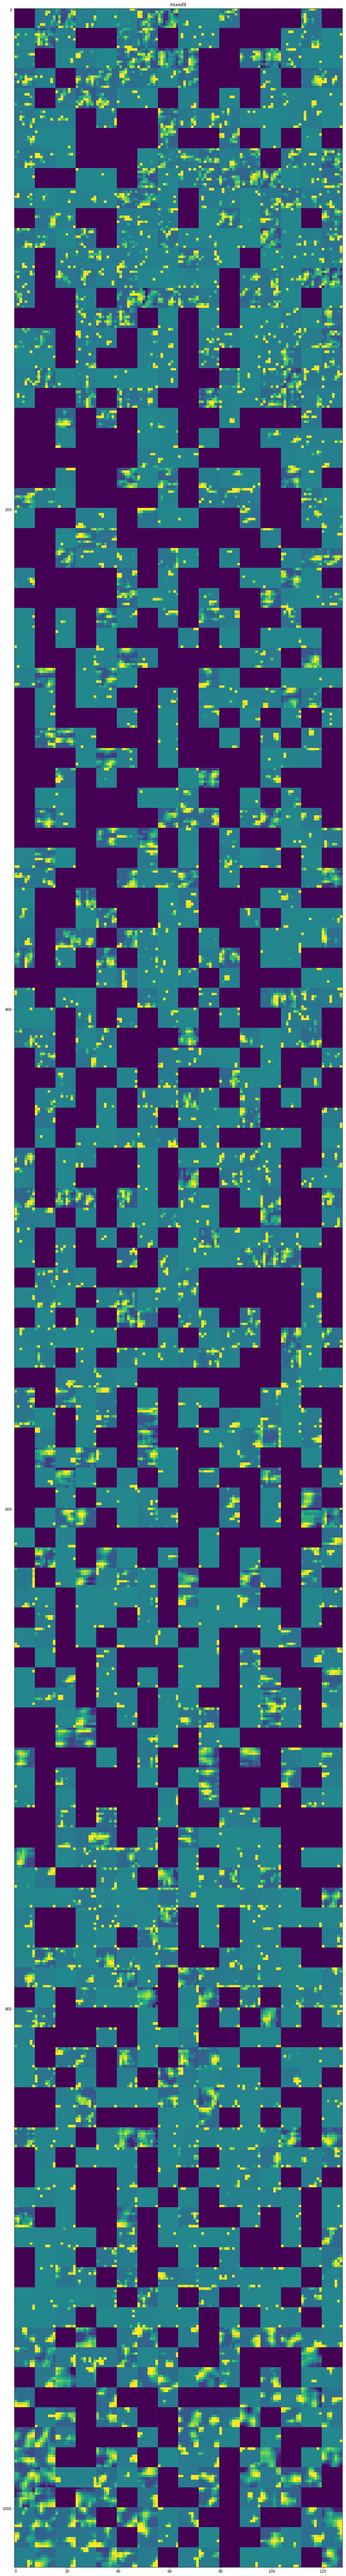

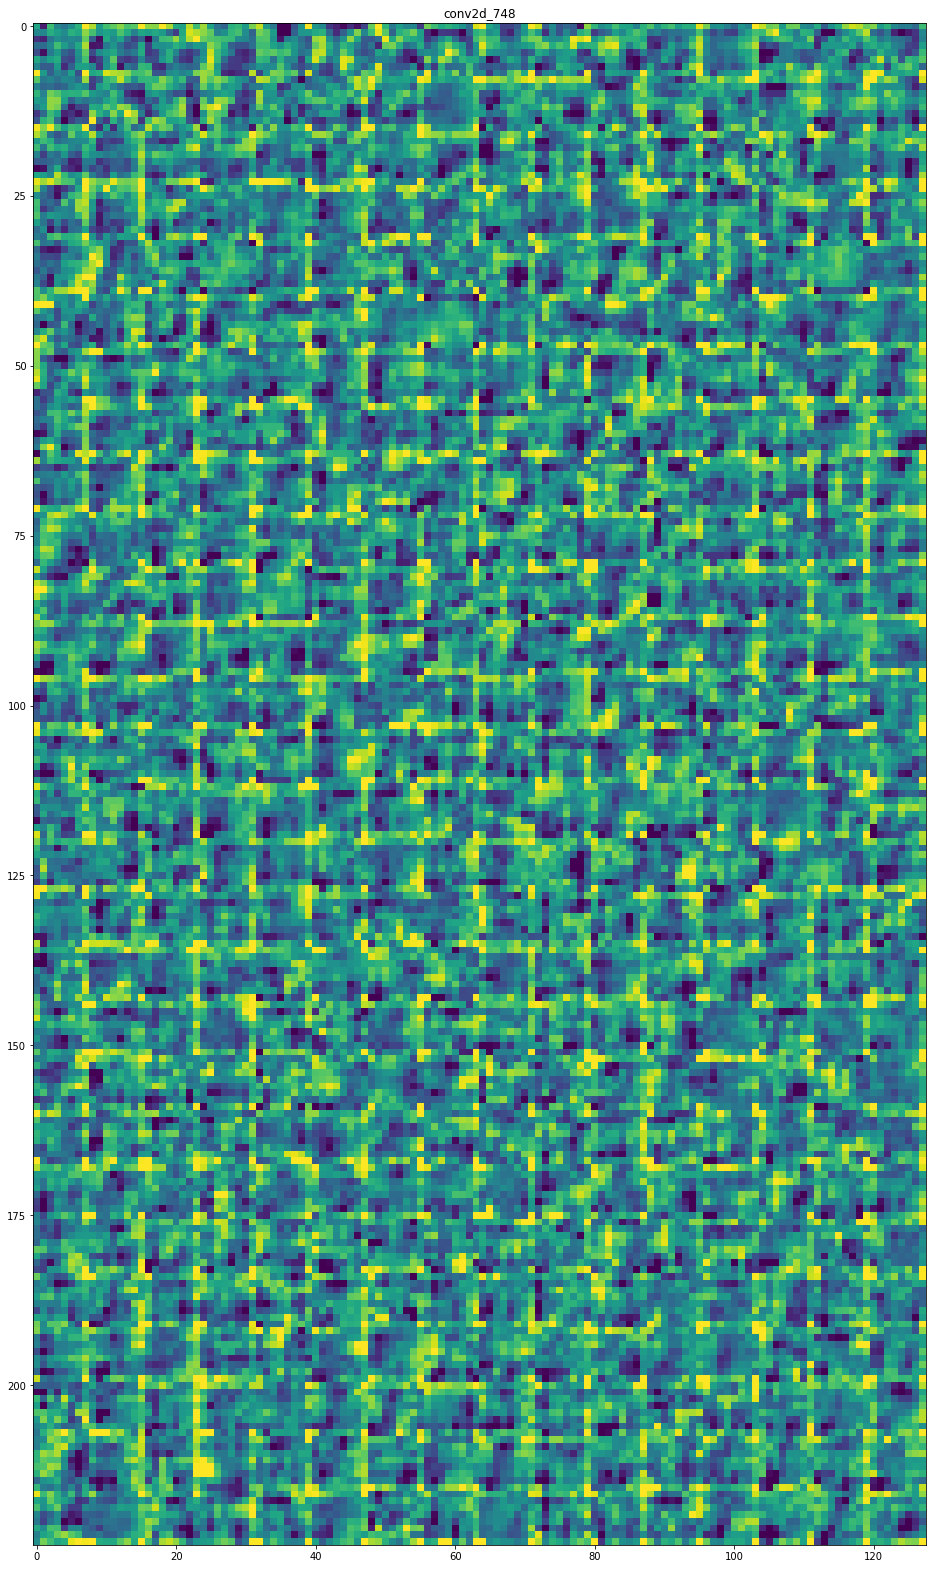

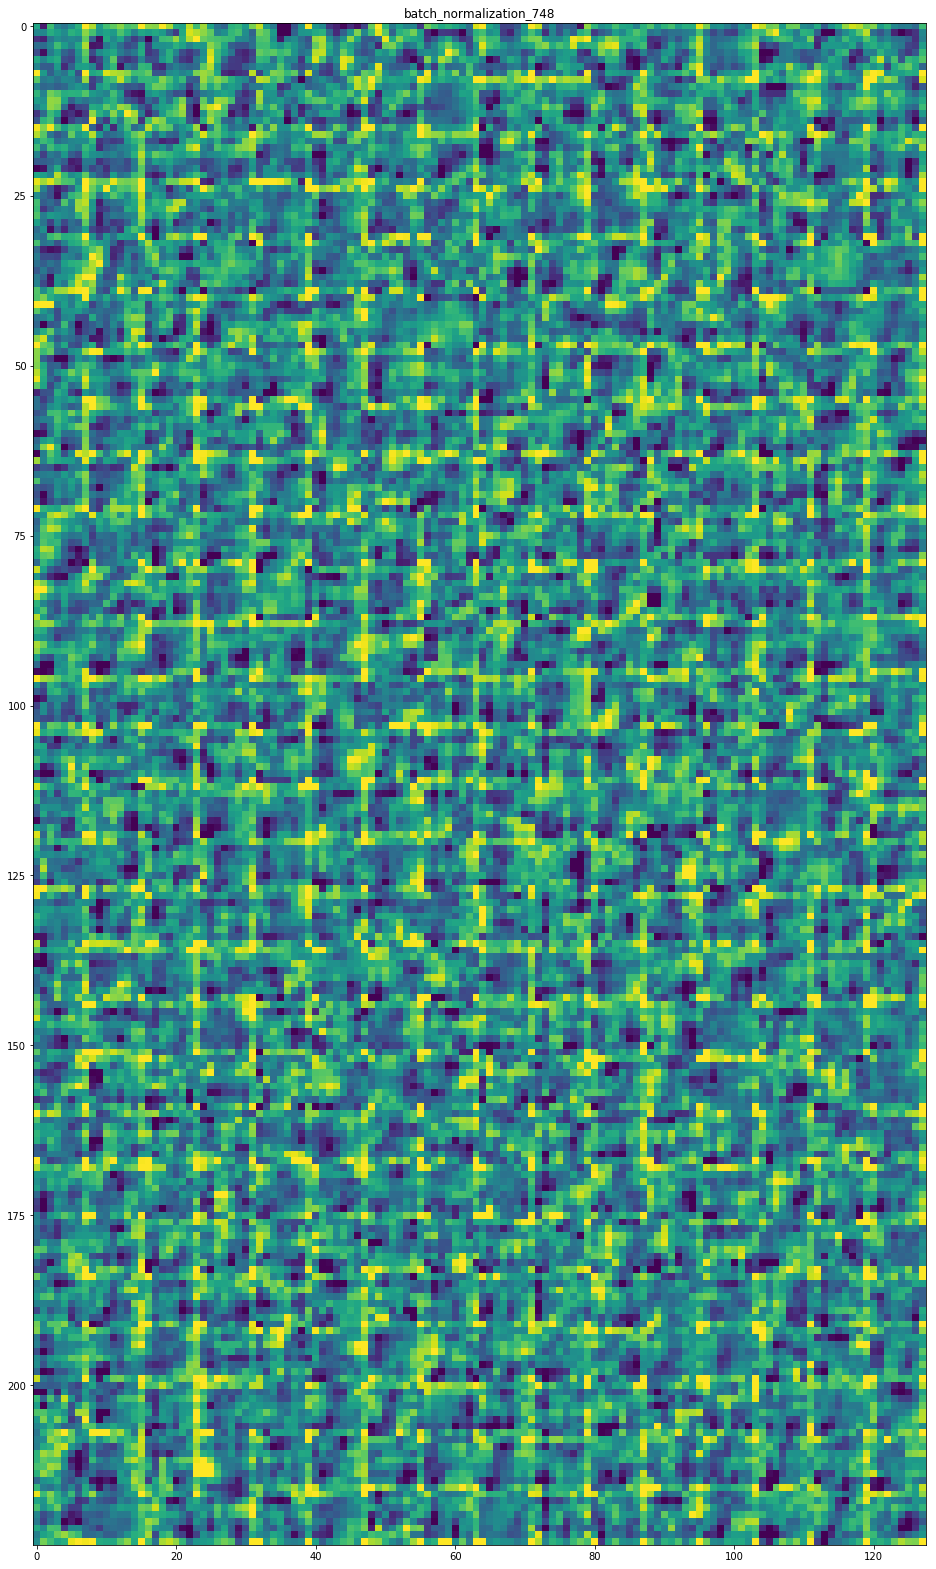

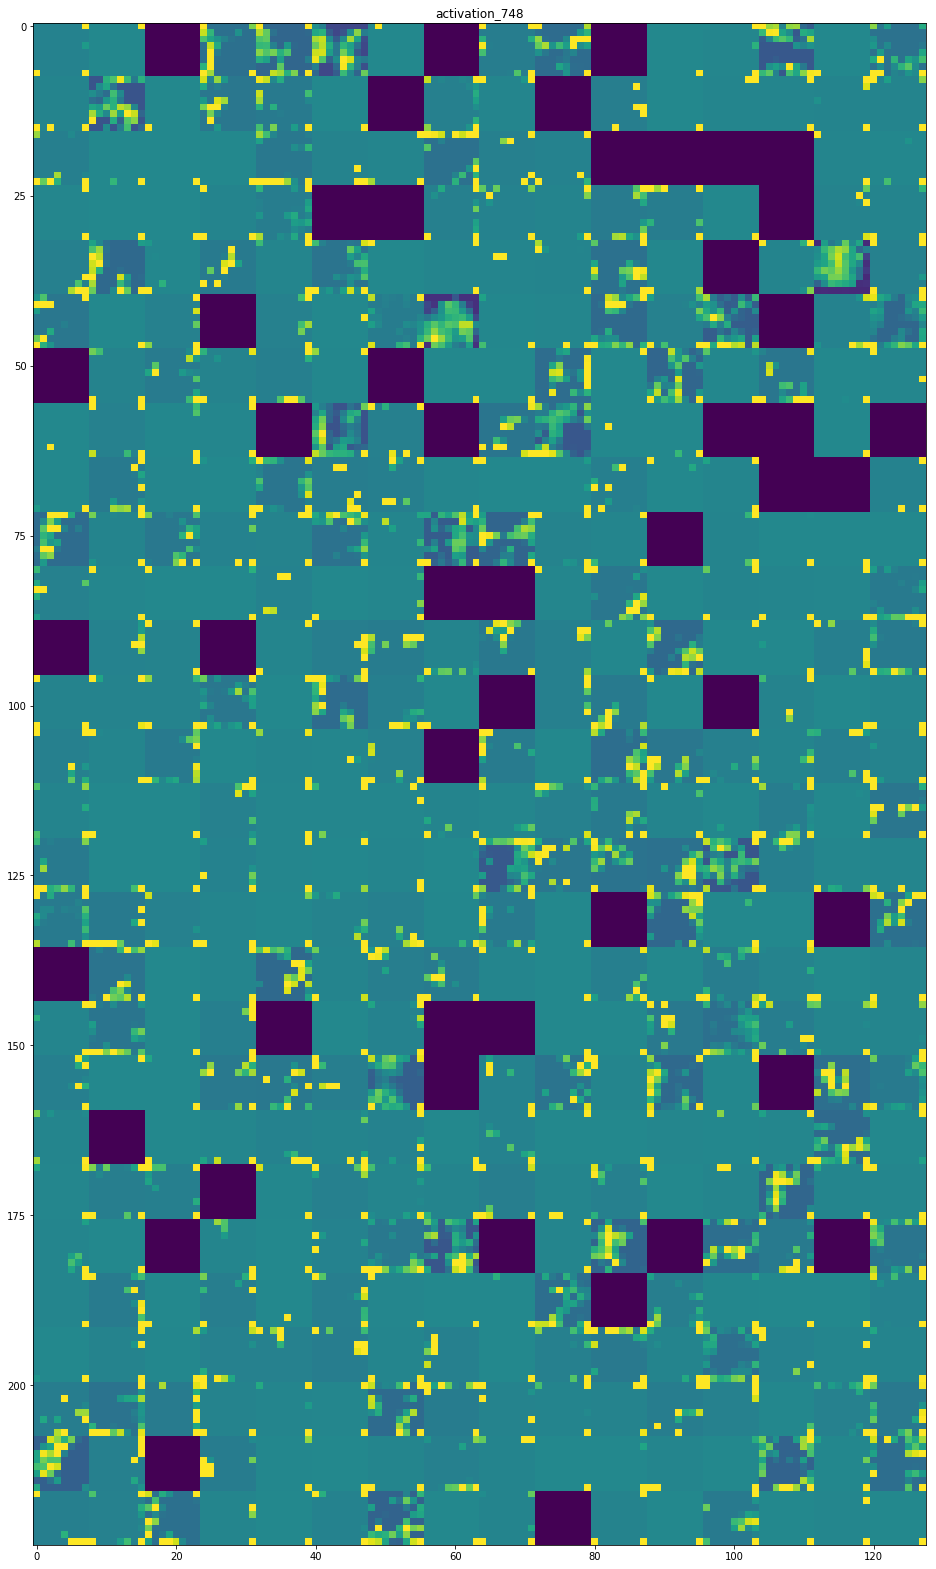

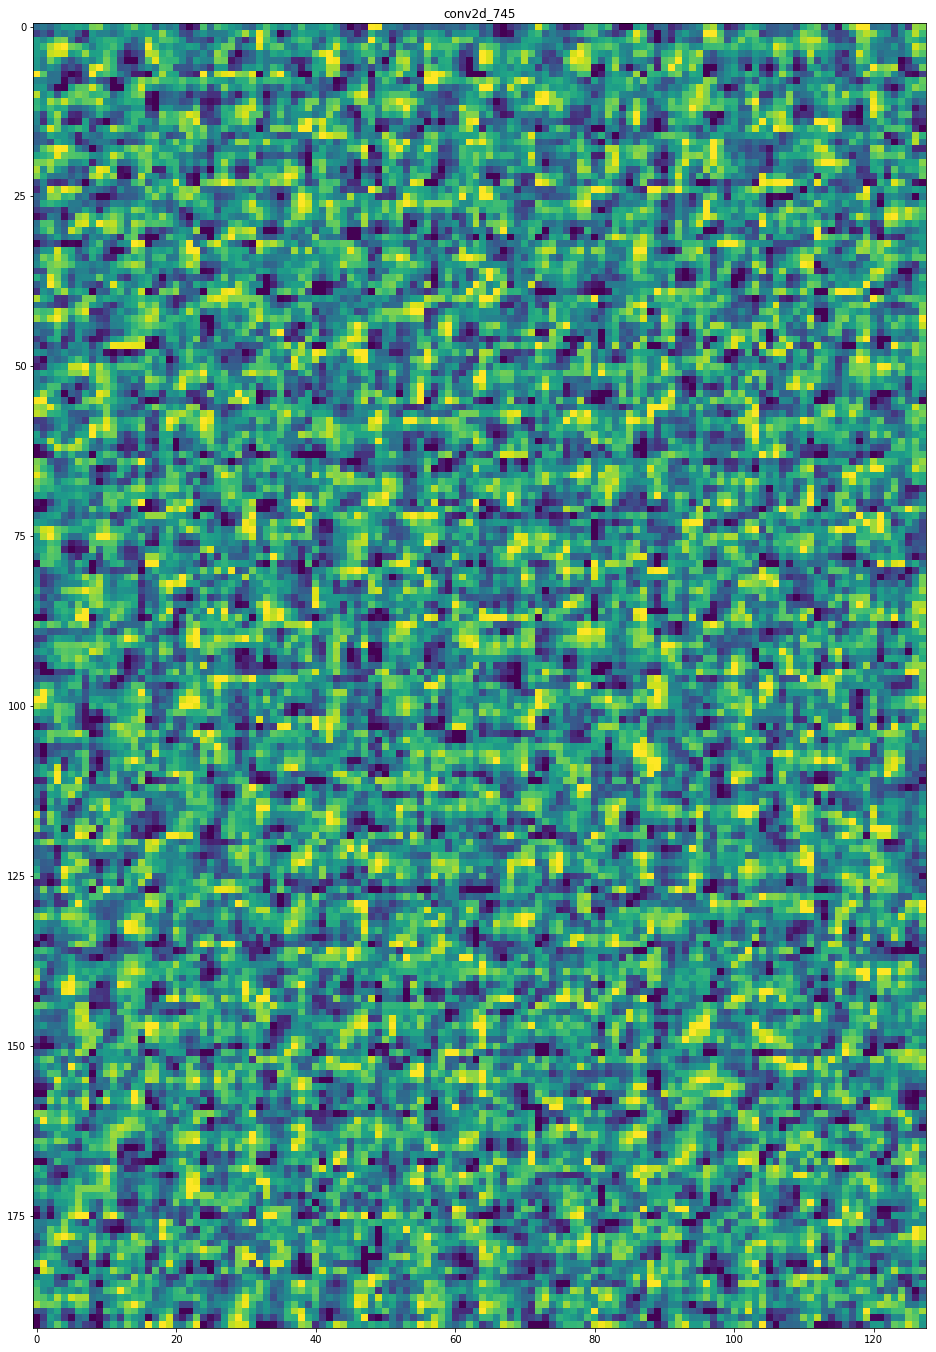

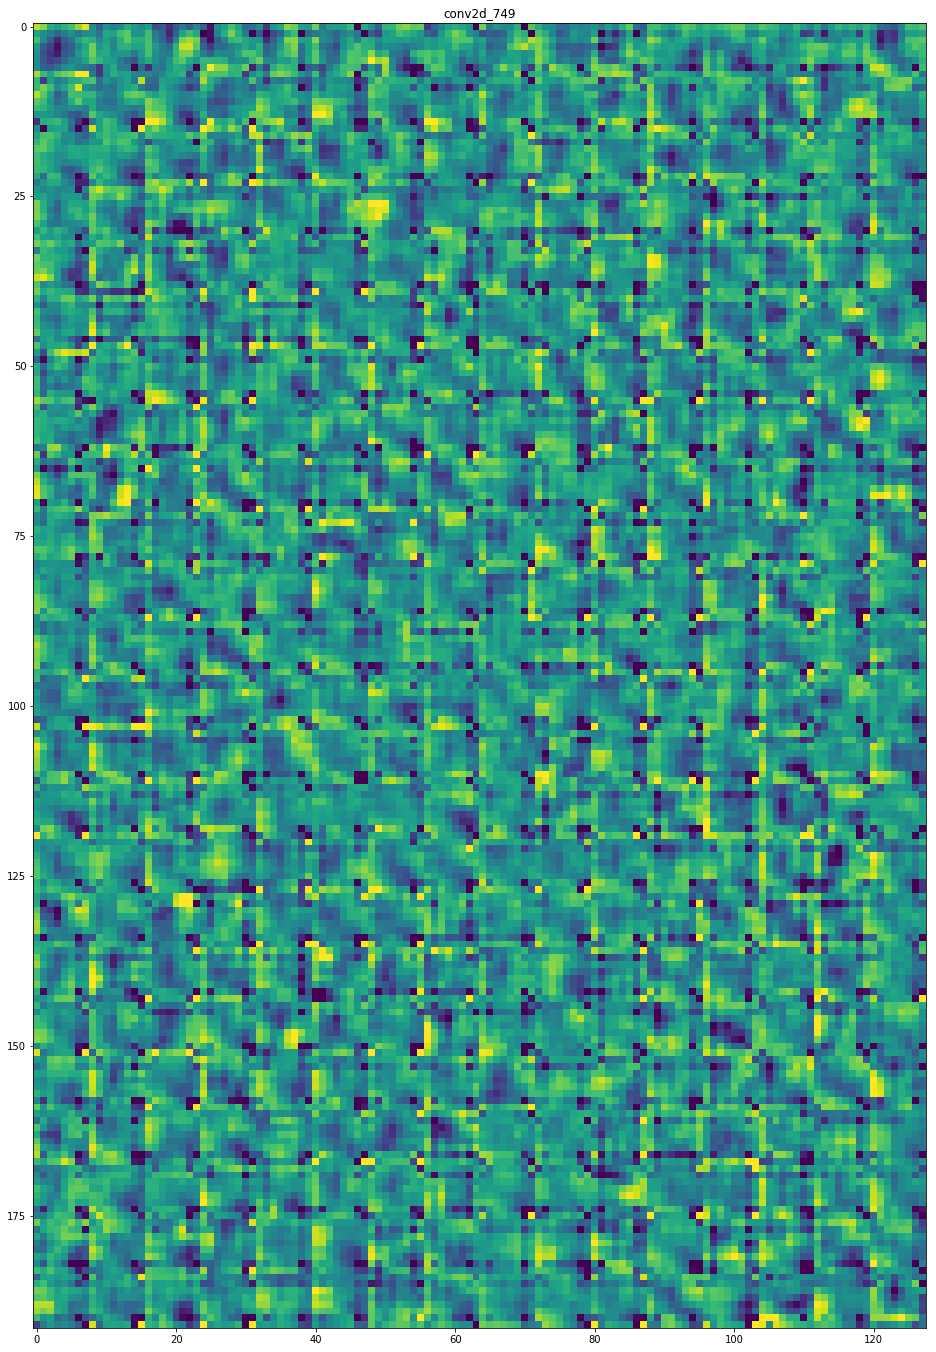

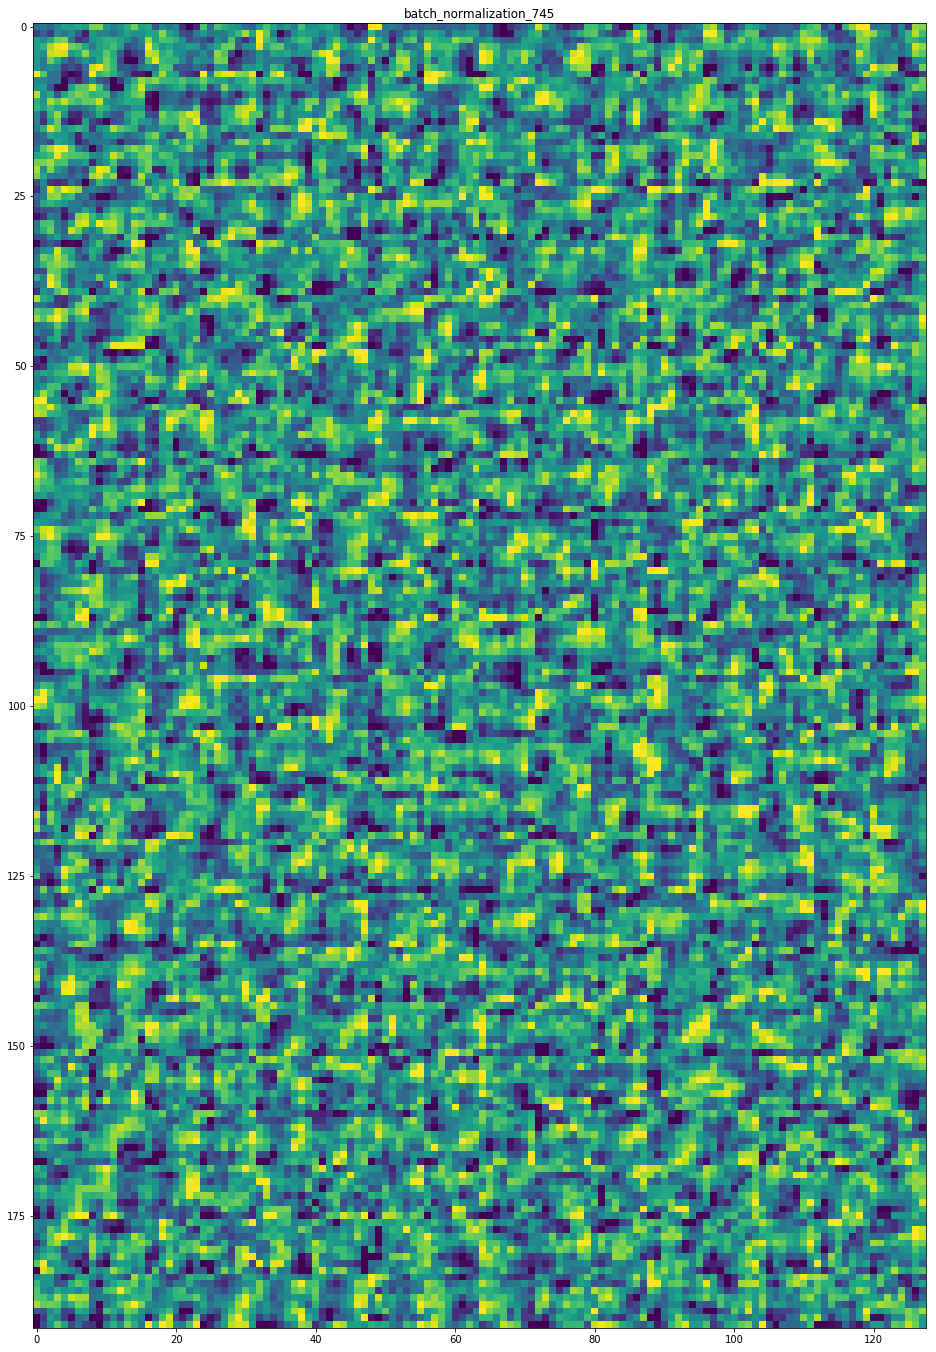

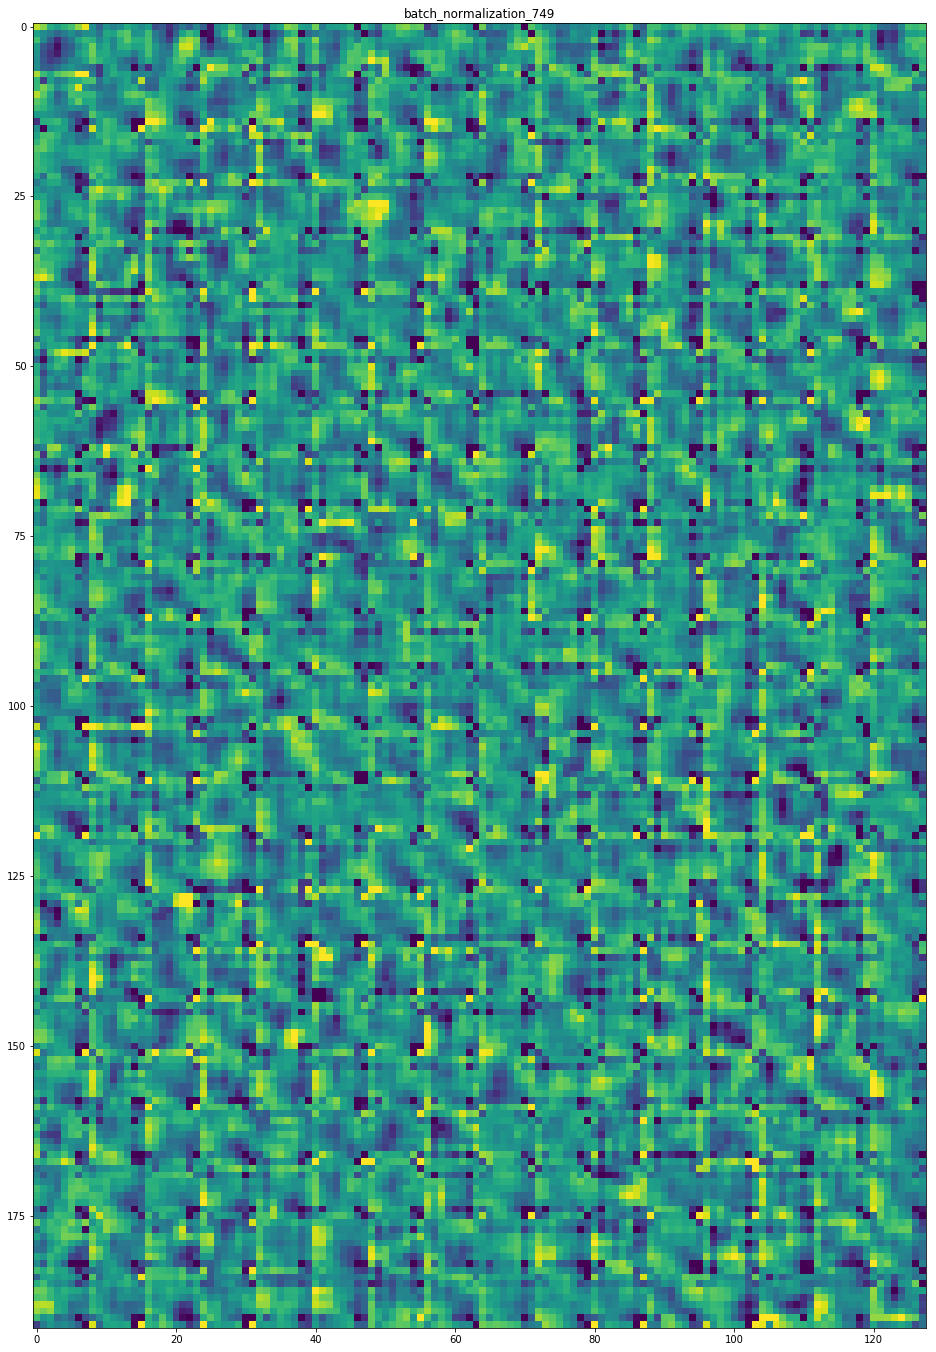

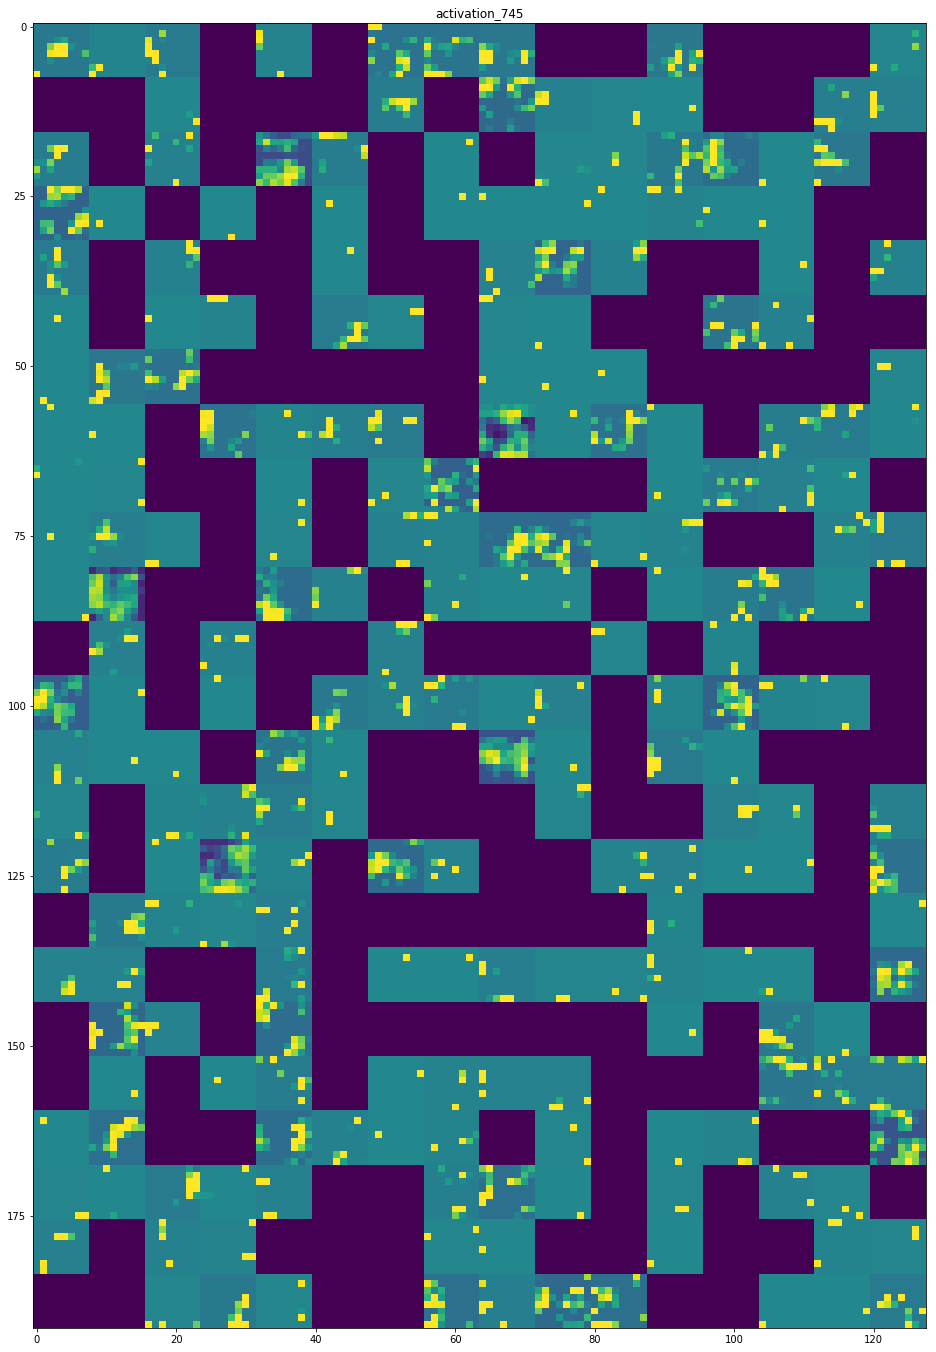

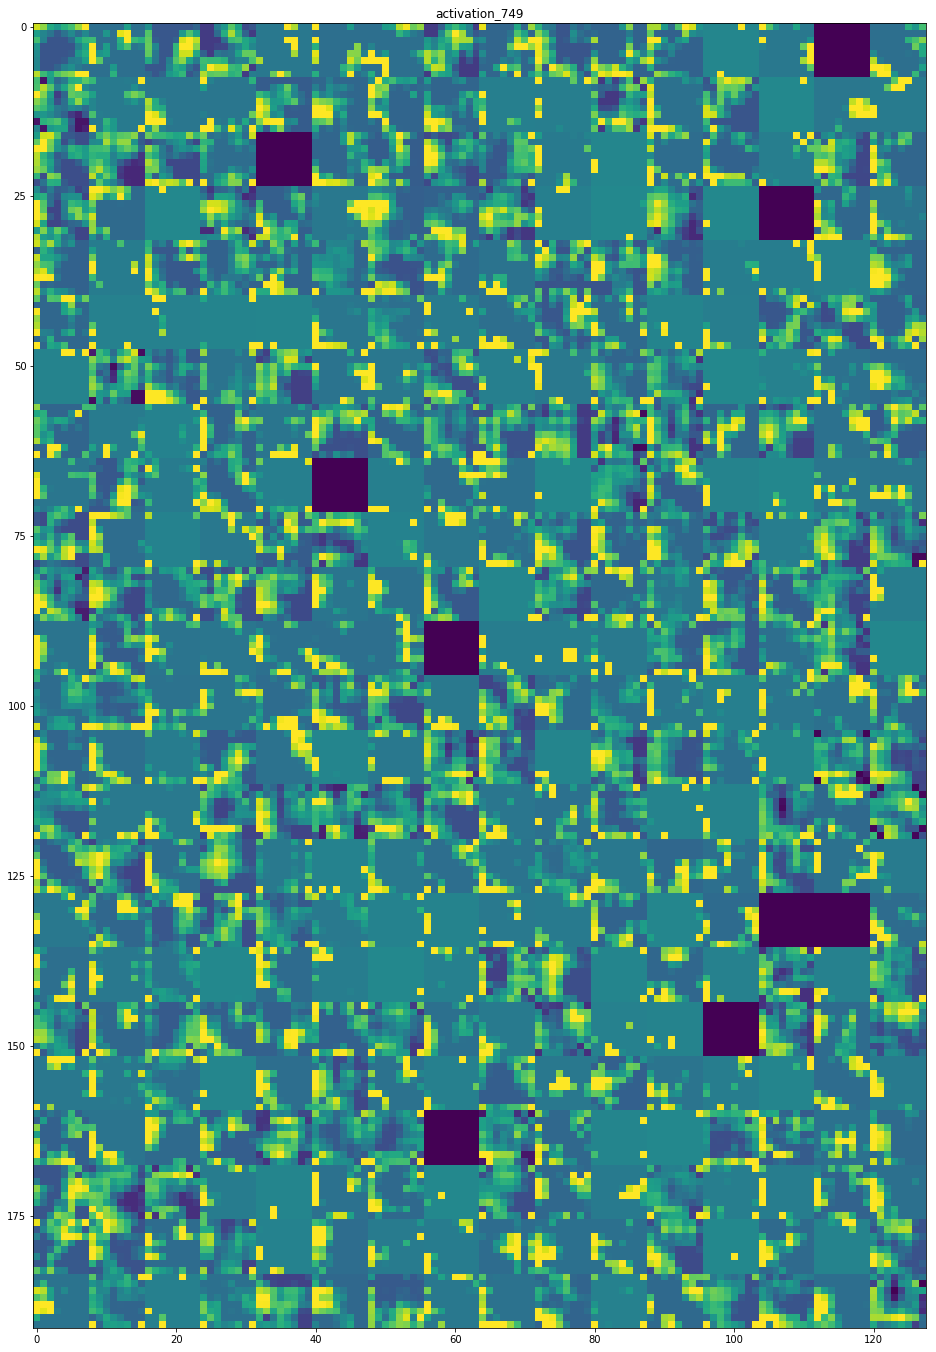

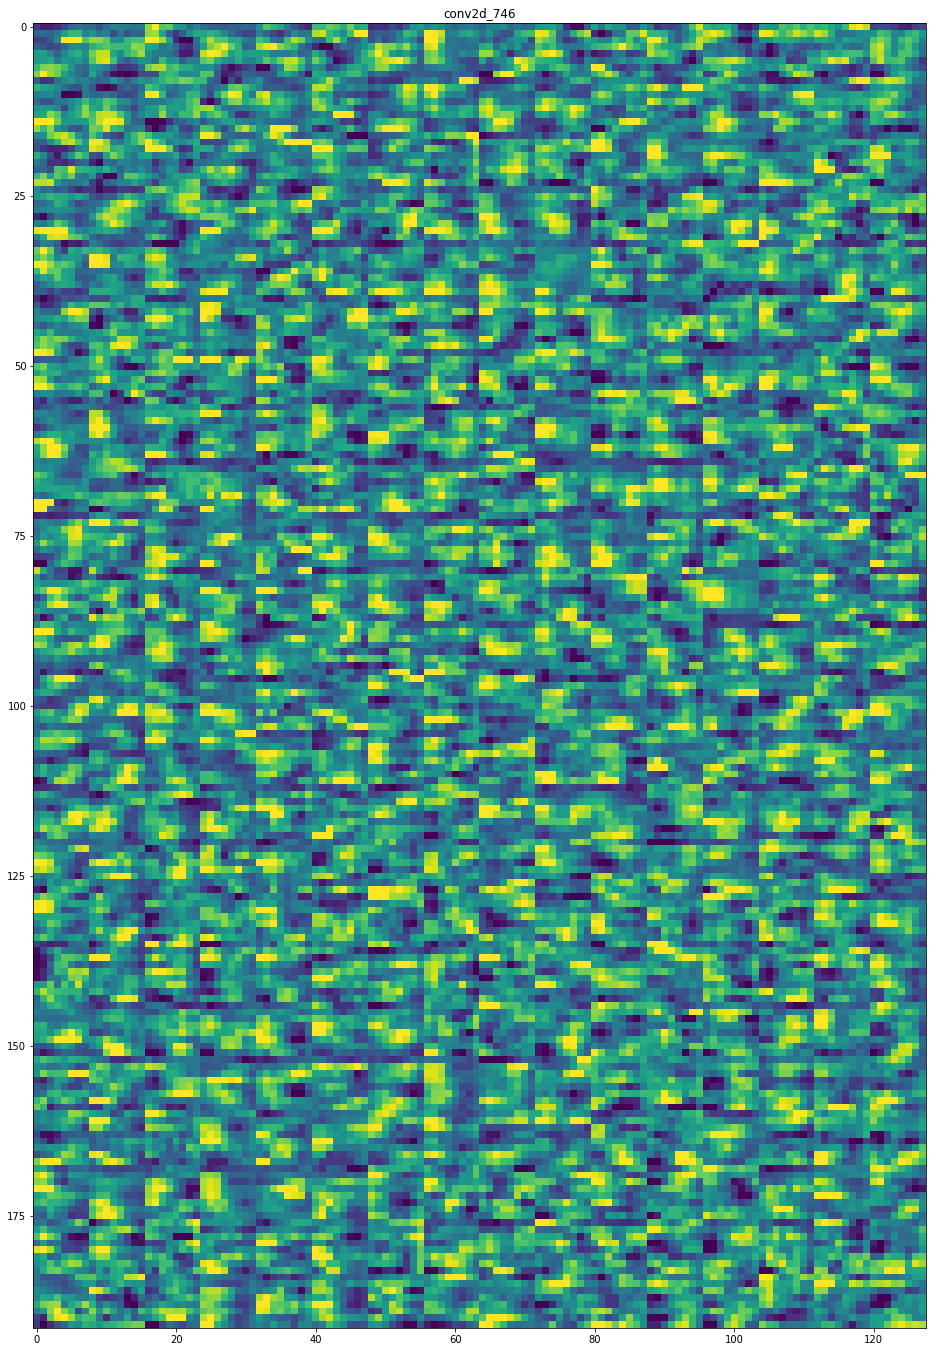

In [158]:
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features
    n_cols=n_cols/images_per_row
    display_grid = np.zeros((size * int(n_cols) , images_per_row * size))
    for col in range(int(n_cols)):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')